# Quickstart
Now that you installation went ok, let's start with a small example.
Let's create our first `Geodes` object.

In [1]:
from pygeodes import Geodes

geodes = Geodes()

## Searching for collections
Then we can start by searching for existing collections, for example with search term *sentinel* :

In [2]:
collections, dataframe = geodes.search_collections("sentinel")

Indexing: 100%|██████████| 4/4 [00:00<00:00, 1954.25it/s]

Matched terms : {('title', b'sentinel'), ('description', b'sentinel')}


Let's see what we found. As a result, we get a `collections` object, which is a list of `Collection` objects.

In [3]:
collections

[<Collection id=PEPS_S2_L1C>,
 <Collection id=PEPS_S2_L2A>,
 <Collection id=PEPS_S1_L2>,
 <Collection id=PEPS_S1_L1>]

and a `dataframe` object, which is a `geopandas.GeoDataFrame`.

In [4]:
dataframe

,title,description,collection
0,PEPS Sentinel-2 L1C tiles,Sentinel-2 L1C tiles acquisition and storage f...,<Collection id=PEPS_S2_L1C>
1,PEPS Sentinel-2 L2A tiles,Sentinel-2 L2A tiles acquisition and storage f...,<Collection id=PEPS_S2_L2A>
2,PEPS Sentinel-1 Level2,Sentinel-1 Level-2 consists of geolocated geop...,<Collection id=PEPS_S1_L2>
3,PEPS Sentinel-1 Level1,Sentinel-1 Level-1 products are the baseline p...,<Collection id=PEPS_S1_L1>


The dataframe let's see you quickly see what you found, with only a few columns (here *description* and *title*), but if you are more comfortable working with raw objects, it's also possible.

Let's see how many elements are in these collections.

In [5]:
for collection in collections:
    print(
        f"collection {collection.title} has {collection.summaries.other.get('total_items')} elements"
    )

collection PEPS Sentinel-2 L1C tiles has 23316151 elements
collection PEPS Sentinel-2 L2A tiles has 0 elements
collection PEPS Sentinel-1 Level2 has 1209303 elements
collection PEPS Sentinel-1 Level1 has 5412056 elements


We could want to add columns to our dataframe. To know which columns are available, use `collection.list_available_keys()` on a `Collection` object : 

In [6]:
collections[0].list_available_keys()

{'assets.toar.description',
 'assets.toar.href',
 'assets.toar.roles',
 'assets.toar.title',
 'assets.toar.type',
 'assets.wms_capabilities.description',
 'assets.wms_capabilities.href',
 'assets.wms_capabilities.roles',
 'assets.wms_capabilities.title',
 'assets.wms_capabilities.type',
 'description',
 'extent.spatial.bbox',
 'extent.temporal.interval',
 'id',
 'keywords',
 'license',
 'links',
 'providers',
 'stac_extensions',
 'stac_version',
 'summaries.contactPoint:fn',
 'summaries.contactPoint:hasEmail',
 'summaries.dataType',
 'summaries.dcs:dataGeometryType',
 'summaries.dcs:itemType',
 'summaries.dcs:platform',
 'summaries.dcs:processingLevel',
 'summaries.dcs:satellite',
 'summaries.dcs:sensor',
 'summaries.dcs:spatialResolutionInMeters',
 'summaries.dcs:temporalResolutionInHours',
 'summaries.distribution:accessURL',
 'summaries.distribution:format',
 'summaries.latest',
 'summaries.thematiques:theme',
 'summaries.thematiques:variables',
 'summaries.total_items',
 'summaries

Let's add `summaries.total_items` to the dataframe : 

In [7]:
from pygeodes.utils.formatting import format_collections

new_dataframe = format_collections(
    dataframe, columns_to_add={"summaries.total_items"}
)

In [8]:
new_dataframe

,title,description,collection,summaries.total_items
0,PEPS Sentinel-2 L1C tiles,Sentinel-2 L1C tiles acquisition and storage f...,<Collection id=PEPS_S2_L1C>,23316151
1,PEPS Sentinel-2 L2A tiles,Sentinel-2 L2A tiles acquisition and storage f...,<Collection id=PEPS_S2_L2A>,0
2,PEPS Sentinel-1 Level2,Sentinel-1 Level-2 consists of geolocated geop...,<Collection id=PEPS_S1_L2>,1209303
3,PEPS Sentinel-1 Level1,Sentinel-1 Level-1 products are the baseline p...,<Collection id=PEPS_S1_L1>,5412056


If you wish to produce a fresh new dataframe with your custom columns, use `format_collections` on a list of collections :  

In [9]:
new_dataframe = format_collections(
    collections,
    columns_to_add={"summaries.dcs:satellite", "summaries.dcs:sensor"},
)

In [10]:
new_dataframe

,summaries.dcs:sensor,title,description,summaries.dcs:satellite,collection
0,[MSI],PEPS Sentinel-2 L1C tiles,Sentinel-2 L1C tiles acquisition and storage f...,[sentinel-2],<Collection id=PEPS_S2_L1C>
1,[MSI],PEPS Sentinel-2 L2A tiles,Sentinel-2 L2A tiles acquisition and storage f...,[sentinel-2],<Collection id=PEPS_S2_L2A>
2,[SAR-C],PEPS Sentinel-1 Level2,Sentinel-1 Level-2 consists of geolocated geop...,[sentinel-1],<Collection id=PEPS_S1_L2>
3,[SAR-C],PEPS Sentinel-1 Level1,Sentinel-1 Level-1 products are the baseline p...,[sentinel-1],<Collection id=PEPS_S1_L1>


**Note** : `title` and `description` columns are always here by default. 

## Searching for items

As for collections, we can search for items.
To know which arguments to put in your query, please use : 



In [11]:
from pygeodes.utils.query import get_requestable_args

print(get_requestable_args())

{'version': 'v7.0', 'attributes': ['dataType (STRING)', 'date (DATE_ISO8601)', 'links (STRING)', 'productValidity (BOOLEAN)', 'doi (STRING_ARRAY)', 'withoutGeom (BOOLEAN)', 'temporal:startDate (DATE_ISO8601)', 'temporal:endDate (DATE_ISO8601)', 'temporal:processingDate (DATE_ISO8601)', 'processing:processingMode (STRING)', 'processing:processingContext (STRING)', 'processing:processingCorrection (STRING)', 'processing:processingVersion (STRING)', 'spatial:bbox (STRING)', 'spatial:nbCols (STRING)', 'spatial:nbRows (STRING)', 'spaceborne:satelliteSensor (STRING)', 'spaceborne:satellitePlatform (STRING)', 'spaceborne:sensorMode (STRING)', 'spaceborne:productLevel (STRING)', 'spaceborne:polarization (STRING)', 'spaceborne:cycleID (INTEGER)', 'spaceborne:missionTakeId (INTEGER)', 'spaceborne:s2TakeId (STRING)', 'spaceborne:orbitID (INTEGER)', 'spaceborne:absoluteOrbitID (LONG)', 'spaceborne:orbitDirection (STRING)', 'spaceborne:productType (STRING)', 'spaceborne:parameter (STRING)', 'spaceb

We see we can use `spaceborne:absoluteOrbitID`. Let's search for example those whose orbit direction is 30972: 

In [12]:
query = {"spaceborne:absoluteOrbitID": {"eq": 30972}}
items, dataframe = geodes.search_items(query=query)

Found 852 items matching your query


852 item(s) found for query : {'spaceborne:absoluteOrbitID': {'eq': 30972}}



Again, we come out with an `items` object, and a `dataframe` object.

In [13]:
len(items)

852

In [14]:
items[:10]  # printing everything is useless

[Item (URN:FEATURE:DATA:gdh:c72b550c-52f5-3fa0-8bc0-633b0d4de8ce:V1),
 Item (URN:FEATURE:DATA:gdh:2327b73a-4cda-3340-8ff6-93477c65d994:V1),
 Item (URN:FEATURE:DATA:gdh:187a9026-dbc4-30fe-8a90-fc54a92d51d4:V1),
 Item (URN:FEATURE:DATA:gdh:ac4337b5-dca0-39a1-9a1f-b9661283d745:V1),
 Item (URN:FEATURE:DATA:gdh:a96dc6c4-8550-339a-8d95-a6e2d07711dc:V1),
 Item (URN:FEATURE:DATA:gdh:a3fb0d87-6c9c-3223-8b38-7414ac309dda:V1),
 Item (URN:FEATURE:DATA:gdh:524d8c1d-ae07-3bc1-acc6-6bf7b5b3581a:V1),
 Item (URN:FEATURE:DATA:gdh:5b627fa7-0cb9-3f4b-859f-b07642e8dbd8:V1),
 Item (URN:FEATURE:DATA:gdh:b9652250-b462-3b04-bdfe-004095fd4bfc:V1),
 Item (URN:FEATURE:DATA:gdh:f630948f-900d-3743-a2c5-fd88b1e6cf9a:V1)]

In [15]:
dataframe

,id,spaceborne:absoluteOrbitID,collection,item,geometry
0,URN:FEATURE:DATA:gdh:c72b550c-52f5-3fa0-8bc0-6...,30972,PEPS_S2_L1C,Item (URN:FEATURE:DATA:gdh:c72b550c-52f5-3fa0-...,"POLYGON ((161.77151 -13.54330, 161.78322 -13.4..."
1,URN:FEATURE:DATA:gdh:2327b73a-4cda-3340-8ff6-9...,30972,PEPS_S2_L1C,Item (URN:FEATURE:DATA:gdh:2327b73a-4cda-3340-...,"POLYGON ((159.93635 -16.36716, 160.96413 -16.3..."
2,URN:FEATURE:DATA:gdh:187a9026-dbc4-30fe-8a90-f...,30972,PEPS_S2_L1C,Item (URN:FEATURE:DATA:gdh:187a9026-dbc4-30fe-...,"POLYGON ((159.95583 -19.98223, 160.31685 -19.9..."
3,URN:FEATURE:DATA:gdh:ac4337b5-dca0-39a1-9a1f-b...,30972,PEPS_S2_L1C,Item (URN:FEATURE:DATA:gdh:ac4337b5-dca0-39a1-...,"POLYGON ((159.96143 -20.88537, 160.10729 -20.8..."
4,URN:FEATURE:DATA:gdh:a96dc6c4-8550-339a-8d95-a...,30972,PEPS_S2_L1C,Item (URN:FEATURE:DATA:gdh:a96dc6c4-8550-339a-...,"POLYGON ((161.73641 -10.02803, 162.55115 -10.0..."
...,...,...,...,...,...
847,URN:FEATURE:DATA:gdh:6089196a-2b30-396d-b9e3-1...,30972,PEPS_S2_L1C,Item (URN:FEATURE:DATA:gdh:6089196a-2b30-396d-...,"POLYGON ((128.99917 -77.56443, 133.41004 -77.5..."
848,URN:FEATURE:DATA:gdh:f2647d63-395a-3f41-8436-b...,30972,PEPS_S2_L1C,Item (URN:FEATURE:DATA:gdh:f2647d63-395a-3f41-...,"POLYGON ((-172.46556 52.25345, -170.85700 52.2..."
849,URN:FEATURE:DATA:gdh:b0eb078f-3b5b-3200-8aa5-c...,30972,PEPS_S2_L1C,Item (URN:FEATURE:DATA:gdh:b0eb078f-3b5b-3200-...,"POLYGON ((175.19956 3.52883, 175.59973 3.52939..."
850,URN:FEATURE:DATA:gdh:7c4bc98f-9088-30eb-bfd4-b...,30972,PEPS_S2_L1C,Item (URN:FEATURE:DATA:gdh:7c4bc98f-9088-30eb-...,"POLYGON ((167.05275 -29.00034, 168.17876 -28.9..."


Let's have a look around our items.

A thing we could want to do is filter them by cloud cover, let's say between 39 and 40. But this column doesn't appear in the dataframe. To know which columns are available, use `item.list_available_keys()` on an `Item` object.



In [16]:
items[0].list_available_keys()

{'accessService:endpointDescription',
 'accessService:endpointURL',
 'dataType',
 'datetime',
 'id',
 'latest',
 'processing:processingVersion',
 'spaceborne:absoluteOrbitID',
 'spaceborne:cloudCover',
 'spaceborne:continentsID',
 'spaceborne:keywords',
 'spaceborne:orbitDirection',
 'spaceborne:orbitID',
 'spaceborne:political.continents',
 'spaceborne:productLevel',
 'spaceborne:productTimeliness',
 'spaceborne:productType',
 'spaceborne:references',
 'spaceborne:s2TakeId',
 'spaceborne:satellitePlatform',
 'spaceborne:satelliteSensor',
 'spaceborne:sensorMode',
 'spaceborne:tile',
 'spatial:bbox',
 'temporal:endDate',
 'temporal:startDate',
 'versionInfo'}

We see we can use `spaceborne:cloudCover`. We can add it using `format_items`.

In [17]:
from pygeodes.utils.formatting import format_items

new_dataframe = format_items(
    dataframe, columns_to_add={"spaceborne:cloudCover"}
)

In [18]:
new_dataframe

,id,spaceborne:absoluteOrbitID,collection,item,geometry,spaceborne:cloudCover
0,URN:FEATURE:DATA:gdh:c72b550c-52f5-3fa0-8bc0-6...,30972,PEPS_S2_L1C,Item (URN:FEATURE:DATA:gdh:c72b550c-52f5-3fa0-...,"POLYGON ((161.77151 -13.54330, 161.78322 -13.4...",26.963872
1,URN:FEATURE:DATA:gdh:2327b73a-4cda-3340-8ff6-9...,30972,PEPS_S2_L1C,Item (URN:FEATURE:DATA:gdh:2327b73a-4cda-3340-...,"POLYGON ((159.93635 -16.36716, 160.96413 -16.3...",30.640658
2,URN:FEATURE:DATA:gdh:187a9026-dbc4-30fe-8a90-f...,30972,PEPS_S2_L1C,Item (URN:FEATURE:DATA:gdh:187a9026-dbc4-30fe-...,"POLYGON ((159.95583 -19.98223, 160.31685 -19.9...",99.388031
3,URN:FEATURE:DATA:gdh:ac4337b5-dca0-39a1-9a1f-b...,30972,PEPS_S2_L1C,Item (URN:FEATURE:DATA:gdh:ac4337b5-dca0-39a1-...,"POLYGON ((159.96143 -20.88537, 160.10729 -20.8...",81.709039
4,URN:FEATURE:DATA:gdh:a96dc6c4-8550-339a-8d95-a...,30972,PEPS_S2_L1C,Item (URN:FEATURE:DATA:gdh:a96dc6c4-8550-339a-...,"POLYGON ((161.73641 -10.02803, 162.55115 -10.0...",96.671742
...,...,...,...,...,...,...
847,URN:FEATURE:DATA:gdh:6089196a-2b30-396d-b9e3-1...,30972,PEPS_S2_L1C,Item (URN:FEATURE:DATA:gdh:6089196a-2b30-396d-...,"POLYGON ((128.99917 -77.56443, 133.41004 -77.5...",78.515004
848,URN:FEATURE:DATA:gdh:f2647d63-395a-3f41-8436-b...,30972,PEPS_S2_L1C,Item (URN:FEATURE:DATA:gdh:f2647d63-395a-3f41-...,"POLYGON ((-172.46556 52.25345, -170.85700 52.2...",98.938786
849,URN:FEATURE:DATA:gdh:b0eb078f-3b5b-3200-8aa5-c...,30972,PEPS_S2_L1C,Item (URN:FEATURE:DATA:gdh:b0eb078f-3b5b-3200-...,"POLYGON ((175.19956 3.52883, 175.59973 3.52939...",98.253387
850,URN:FEATURE:DATA:gdh:7c4bc98f-9088-30eb-bfd4-b...,30972,PEPS_S2_L1C,Item (URN:FEATURE:DATA:gdh:7c4bc98f-9088-30eb-...,"POLYGON ((167.05275 -29.00034, 168.17876 -28.9...",100.000000


We've got our new dataframe. Let's filter :

In [19]:
filtered = new_dataframe[
    (new_dataframe["spaceborne:cloudCover"] <= 40)
    & (new_dataframe["spaceborne:cloudCover"] >= 39)
]

In [20]:
filtered

,id,spaceborne:absoluteOrbitID,collection,item,geometry,spaceborne:cloudCover
83,URN:FEATURE:DATA:gdh:e4c321cd-3e90-3a97-a357-5...,30972,PEPS_S2_L1C,Item (URN:FEATURE:DATA:gdh:e4c321cd-3e90-3a97-...,"POLYGON ((170.99981 -15.46502, 171.41679 -15.4...",39.599036
461,URN:FEATURE:DATA:gdh:c10655c6-e1ed-3173-a460-8...,30972,PEPS_S2_L1C,Item (URN:FEATURE:DATA:gdh:c10655c6-e1ed-3173-...,"POLYGON ((144.49933 -66.76234, 145.76351 -66.7...",39.071231
530,URN:FEATURE:DATA:gdh:20afef16-f166-3e08-ba5e-c...,30972,PEPS_S2_L1C,Item (URN:FEATURE:DATA:gdh:20afef16-f166-3e08-...,"POLYGON ((158.07383 -29.01282, 158.08245 -28.0...",39.539162
721,URN:FEATURE:DATA:gdh:9635442b-1548-39e7-9095-1...,30972,PEPS_S2_L1C,Item (URN:FEATURE:DATA:gdh:9635442b-1548-39e7-...,"POLYGON ((161.75303 -11.83511, 162.15183 -11.8...",39.921501


Let's plot these items : 

In [21]:
m = filtered.explore()

In [22]:
m

If you want to have all available columns in your dataframe, just do :

In [23]:
full_dataframe = format_items(
    items, columns_to_add=items[0].list_available_keys()
)

In [24]:
full_dataframe

,datetime,spaceborne:absoluteOrbitID,spaceborne:keywords,collection,spaceborne:productType,dataType,spaceborne:orbitDirection,spaceborne:continentsID,spaceborne:productLevel,spaceborne:references,...,processing:processingVersion,spaceborne:s2TakeId,accessService:endpointURL,spaceborne:political.continents,spatial:bbox,versionInfo,id,temporal:endDate,item,geometry
0,2023-08-07T13:55:38.823000Z,30972,"[location:tropical, location:southern, season:...",PEPS_S2_L1C,S2MSI1C,PEPS_S2_L1C,Descending,[],L1C,[{'url': 'http://www.naturalearthdata.com/down...,...,05.00,GS2A_20210527T233821_030972_N05.00,https://s3.datalake.cnes.fr/sentinel2-l1c/57/L...,[],"161.77151396695,-13.543297699414,161.816238781...",00.00,URN:FEATURE:DATA:gdh:c72b550c-52f5-3fa0-8bc0-6...,2021-05-27T23:38:21.024Z,Item (URN:FEATURE:DATA:gdh:c72b550c-52f5-3fa0-...,"POLYGON ((161.77151 -13.54330, 161.78322 -13.4..."
1,2023-08-07T13:55:54.466000Z,30972,"[location:tropical, location:southern, season:...",PEPS_S2_L1C,S2MSI1C,PEPS_S2_L1C,Descending,[],L1C,[{'url': 'http://www.naturalearthdata.com/down...,...,05.00,GS2A_20210527T233821_030972_N05.00,https://s3.datalake.cnes.fr/sentinel2-l1c/57/L...,[],"159.93634686752,-16.367164183361,160.954547796...",00.00,URN:FEATURE:DATA:gdh:2327b73a-4cda-3340-8ff6-9...,2021-05-27T23:38:21.024Z,Item (URN:FEATURE:DATA:gdh:2327b73a-4cda-3340-...,"POLYGON ((159.93635 -16.36716, 160.96413 -16.3..."
2,2023-08-07T13:56:04.377000Z,30972,"[location:tropical, location:southern, season:...",PEPS_S2_L1C,S2MSI1C,PEPS_S2_L1C,Descending,[],L1C,[{'url': 'http://www.naturalearthdata.com/down...,...,05.00,GS2A_20210527T233821_030972_N05.00,https://s3.datalake.cnes.fr/sentinel2-l1c/57/K...,[],"159.95583373941,-19.982230511911,160.342529421...",00.00,URN:FEATURE:DATA:gdh:187a9026-dbc4-30fe-8a90-f...,2021-05-27T23:38:21.024Z,Item (URN:FEATURE:DATA:gdh:187a9026-dbc4-30fe-...,"POLYGON ((159.95583 -19.98223, 160.31685 -19.9..."
3,2023-08-07T13:56:24.952000Z,30972,"[location:tropical, location:southern, season:...",PEPS_S2_L1C,S2MSI1C,PEPS_S2_L1C,Descending,[],L1C,[{'url': 'http://www.naturalearthdata.com/down...,...,05.00,GS2A_20210527T233821_030972_N05.00,https://s3.datalake.cnes.fr/sentinel2-l1c/57/K...,[],"159.96143100666,-20.885366094496,160.136652542...",00.00,URN:FEATURE:DATA:gdh:ac4337b5-dca0-39a1-9a1f-b...,2021-05-27T23:38:21.024Z,Item (URN:FEATURE:DATA:gdh:ac4337b5-dca0-39a1-...,"POLYGON ((159.96143 -20.88537, 160.10729 -20.8..."
4,2023-08-07T13:56:18.875000Z,30972,"[location:tropical, location:southern, season:...",PEPS_S2_L1C,S2MSI1C,PEPS_S2_L1C,Descending,[],L1C,[{'url': 'http://www.naturalearthdata.com/down...,...,05.00,GS2A_20210527T233821_030972_N05.00,https://s3.datalake.cnes.fr/sentinel2-l1c/57/L...,[],"161.73640664108,-10.028033044382,162.571503370...",00.00,URN:FEATURE:DATA:gdh:a96dc6c4-8550-339a-8d95-a...,2021-05-27T23:38:21.024Z,Item (URN:FEATURE:DATA:gdh:a96dc6c4-8550-339a-...,"POLYGON ((161.73641 -10.02803, 162.55115 -10.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,2023-02-10T01:39:01.038000Z,30972,"[location:southern, season:summer]",PEPS_S2_L1C,S2MSI1C,PEPS_S2_L1C,Descending,[AN],L1C,[{'url': 'http://www.naturalearthdata.com/down...,...,05.09,GS2B_20230209T231349_030972_N05.09,https://s3.datalake.cnes.fr/sentinel2-l1c/52/C...,"[{'id': 'continent:Antarctica:6255152', 'name'...","128.99916801842,-77.564425417387,133.544499891...",00.00,URN:FEATURE:DATA:gdh:6089196a-2b30-396d-b9e3-1...,2023-02-09T23:13:49.024Z,Item (URN:FEATURE:DATA:gdh:6089196a-2b30-396d-...,"POLYGON ((128.99917 -77.56443, 133.41004 -77.5..."
848,2023-02-10T01:08:09.184000Z,30972,"[location:northern, location:coastal, season:w...",PEPS_S2_L1C,S2MSI1C,PEPS_S2_L1C,Descending,[NA],L1C,[{'url': 'http://www.naturalearthdata.com/down...,...,05.09,GS2B_20230209T223659_030972_N05.09,https://s3.datalake.cnes.fr/sentinel2-l1c/02/U...,"[{'id': 'continent:NorthAmerica:6255149', 'nam...","-172.46556,52.253449535173,-170.85373,53.2

## Providing an api key
The next parts involve requests that require an api-key. You can register one using the following method. We will also set a default download directory, for later. We use a file `config.json` formed as follows : 

```json
{"api_key" : "MyApiKey","download_dir" : "/tmp"}
```

In [25]:
from pygeodes import Config

conf = Config.from_file("config.json")
geodes.set_conf(conf)

Other ways to configure pygeodes are described in [configuration](configuration.rst).

## Quicklook
Now we can have a look at our items.

Quicklook of Item (URN:FEATURE:DATA:gdh:e4c321cd-3e90-3a97-a357-5d64ca3e8e49:V1)


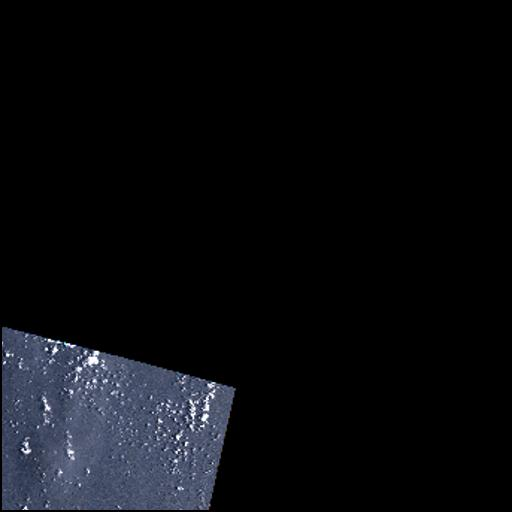

Quicklook of Item (URN:FEATURE:DATA:gdh:c10655c6-e1ed-3173-a460-88573c359320:V1)


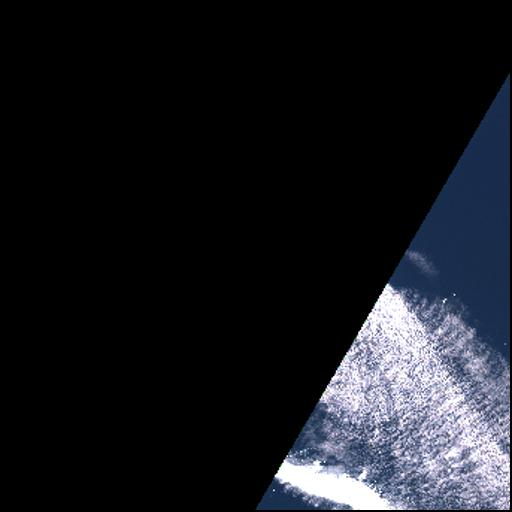

Quicklook of Item (URN:FEATURE:DATA:gdh:20afef16-f166-3e08-ba5e-c20e6cda60c1:V1)


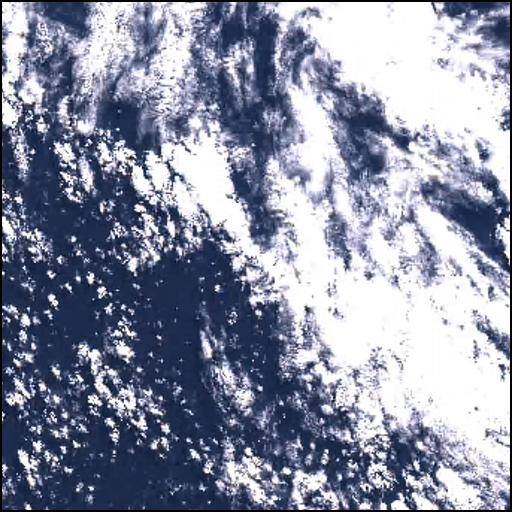

Quicklook of Item (URN:FEATURE:DATA:gdh:9635442b-1548-39e7-9095-1d2f3bc89df4:V1)


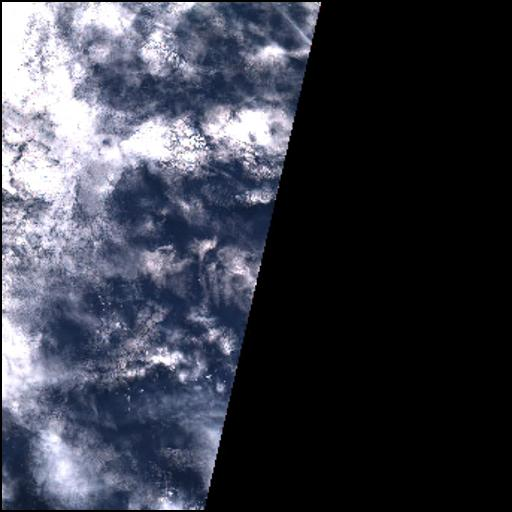

In [26]:
for item in filtered["item"]:
    print(f"Quicklook of {item}")
    item.show_quicklook()

## Downloading items

Now we could want to download these items for further use :

In [27]:
for item in filtered["item"]:
    item.download_archive()

Download completed at /tmp/S2B_MSIL1C_20230209T230019_N0509_R058_T59LND_20230210T001018.zip


Download completed at /tmp/S2B_MSIL1C_20230209T231349_N0509_R058_T54DXM_20230210T001003.zip


Download completed at /tmp/S2A_MSIL1C_20210527T234311_N0500_R087_T57JUJ_20230301T001059.zip


Download completed at /tmp/S2A_MSIL1C_20210527T233821_N0500_R087_T57LZH_20230316T103827.zip


As we provided `/tmp` as default download dir, the downloads are stored in this folder.